In [1]:
# add utils
import sys
sys.path.append('../../the_original_problem/')


# sample script imports
import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread

In [2]:
#path variables
data_path = '../../the_original_problem/data'

In [3]:
# for function structure idea - default layout
def classify_random(im):
    '''
    Example submission for coding challenge. 
    
    Args: im (nxmx3) unsigned 8-bit color image 
    Returns: One of three strings: 'brick', 'ball', or 'cylinder'
    
    '''
    #Let's guess randomly! Maybe we'll get lucky.
    labels = ['brick', 'ball', 'cylinder']
    random_integer = np.random.randint(low = 0, high = 3)
    
    return labels[random_integer]

In [4]:
#Evaluate Script
## ------------------------- ##
##
## evaluate.py
## Basic image processing utilties.
## 
##
## ------------------------- ##

import numpy as np
import glob
from easydict import EasyDict
from matplotlib.pyplot import imread
import time

#Import student's method:
#from sample_student import classify

program_start = time.time()

dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
weights = [0.5, 0.2, 0.2, 0.1]
classes = ['ball', 'brick', 'cylinder']
#data_path = '../data' #Assuming data is one directory up. 

dataset_weights = {}
for i in range(len(dataset_names)):
    dataset_weights[dataset_names[i]] = weights[i]

#Store data performance data in a nested easydict:
performance = EasyDict()
total_time = 0

#Iterate through images:
for dataset_name in dataset_names:
    performance[dataset_name] = EasyDict()
    performance[dataset_name]['overall'] = np.array([0, 0]) #overall Correct/incorrect
    
    for image_class in classes:
        performance[dataset_name][image_class] = np.array([0, 0])
        image_paths = glob.glob(data_path + '/' 
                                + dataset_name + '/' 
                                + image_class + '/*.jpg')
        
        for image_path in image_paths:
            im = imread(image_path)
            
            start_time = time.time()
            #####################
            prediction = classify_random(im)
            # My function goes here to compare
            
            #####################
            end_time = time.time()
            total_time += (end_time - start_time)
            
            if image_class == prediction:
                performance[dataset_name][image_class][0] += 1
            else:
                performance[dataset_name][image_class][1] += 1
                
        #Tally overall performance for class
        performance[dataset_name]['overall'] = performance[dataset_name]['overall'] \
                                               + performance[dataset_name][image_class]


#Print out errors: 
print('Fraction of Correct Predictions: ')
overall_accuracy = 0
for dataset_name in dataset_names:
    total_correct, total_incorrect = performance[dataset_name]['overall']
    total = total_correct + total_incorrect
    accuracy = np.round(float(total_correct)/total, 4)
    overall_accuracy += accuracy * dataset_weights[dataset_name]
    performance[dataset_name]['accuracy'] = accuracy
    print(dataset_name + ': ' + \
           '(' + str(total_correct) + '/' + str(total) + ' = ' + \
           str(accuracy) + ')')
    
    for image_class in classes:
        print('   ' + image_class + ': '
              + str(performance[dataset_name][image_class][0])
              + '/'
              + str(np.sum(performance[dataset_name][image_class])))

overall_accuracy = np.round(overall_accuracy, 2)
score = 0

if overall_accuracy >= 0.6:
   score = 10
elif overall_accuracy >= 0.55:
   score = 9
elif overall_accuracy >= 0.5:
   score = 8
elif overall_accuracy >= 0.45:
   score = 7
elif overall_accuracy >= 0.4:
   score = 6
elif overall_accuracy >= 0.35:
   score = 5
elif overall_accuracy >= 0:
   score = 4


print("\nOverall Accuracy = ", overall_accuracy)
print("Score = ", score)

program_end = time.time()
complete_time = program_end - program_start
total_time =  round(total_time, 5)
complete_time = round(complete_time, 5)

print("Classification time (seconds): = ", total_time)
print("Program completetion time (seconds): = ", complete_time)


Fraction of Correct Predictions: 
easy: (10/27 = 0.3704)
   ball: 5/9
   brick: 2/9
   cylinder: 3/9
medium_1: (4/12 = 0.3333)
   ball: 1/4
   brick: 2/5
   cylinder: 1/3
medium_2: (4/8 = 0.5)
   ball: 0/3
   brick: 1/2
   cylinder: 3/3
hard: (9/23 = 0.3913)
   ball: 4/10
   brick: 2/8
   cylinder: 3/5

Overall Accuracy =  0.39
Score =  5
Classification time (seconds): =  0.001
Program completetion time (seconds): =  0.20844


In [5]:
# for path verify use
import os
os.listdir('../../the_original_problem/data')

['.DS_Store', 'easy', 'hard', 'medium_1', 'medium_2']

In [6]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [50]:
dataset_names = ['easy', 'medium_1', 'medium_2', 'hard']
classes = ['ball', 'brick', 'cylinder'] 
dataset_name = dataset_names[0]
image_class = classes[2]
image_paths = glob.glob(data_path + '/' + dataset_name + '/' + image_class + '/*.jpg')
image_path =  image_paths[4]
print(image_path)
image = imread(image_path)
prediction = classify_random(image)
if image_class == prediction:
    print('match')
    fig = figure(0, (12,12))
    imshow(im)
else:
    print('not match')

../../the_original_problem/data/easy/cylinder\cylinder_5.jpg
not match


In [51]:
from util.filters import filter_2d
from util.image import convert_to_grayscale

In [86]:
def canny_edge(im):
    #grayscale
    im = convert_to_grayscale(im)
    #im = np.mean(im, axis = 2)
    
    #Implement Sobel kernels as numpy arrays
    Kx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])
    
    Gx = filter_2d(im,Kx)
    Gy = filter_2d(im,Ky)
    #Compute Gradient Magnitude:
    gm = np.sqrt(Gx**2+Gy**2)    
    #Arctan2 works a little better here, allowing us to avoid dividing by zero:
    gd = np.arctan2(Gy, Gx)
    
    gLocalMax=gm
    
    for row in range(1,gm.shape[0]-2):
        for col in range(1,gm.shape[1]-2):
            v= gm[row][col]
            theta = gd[row][col]
            if (theta>=(-pi/8.0) and theta<(pi/8.0)) and (v<gm[row][col-1] or v<gm[row][col+1]):
                gLocalMax[row][col]=0
            elif (theta>=(pi/8.0) and theta<((3*pi)/8.0)) and ((v<gm[row-1][col-1] or v<gm[row+1][col+1])):
                gLocalMax[row][col]=0
            elif (theta>=((3*pi)/8.0) and theta<((5*pi)/8.0)) and (v<gm[row-1][col] or v<gm[row+1][col]):
                gLocalMax[row][col]=0
            elif (theta>=((5*pi)/8.0) and theta<((7*pi)/8.0)) and (v<gm[row+1][col-1] or v<gm[row-1][col+1]):
                gLocalMax[row][col]=0
            elif ((theta>=((7*pi)/8.0) or theta<((-7*pi)/8.0)) and ((v<gm[row][col-1] or v<gm[row][col+1]))):
                gLocalMax[row][col]=0 
            elif (theta>=((-7*pi)/8.0) and theta<((-5*pi)/8.0)) and ((v<gm[row-1][col-1] or v<gm[row+1][col+1])):
                gLocalMax[row][col]=0
            elif (theta>=((-5*pi)/8.0) and theta<((-3*pi)/8.0)) and ((v<gm[row-1][col] or v<gm[row+1][col])):
                gLocalMax[row][col]=0
            elif (theta>=((-3*pi)/8.0) and theta<((-pi)/8.0)) and ((v<gm[row+1][col-1] or v<gm[row-1][col+1])):
                gLocalMax[row][col]=0    
    #Double threshold
    strongEdges = (gLocalMax > 100)
    #print(gLocalMax.max())
    #Strong has value 2, weak has value 1
    thresholdedEdges = np.array(strongEdges, dtype=np.uint8) + (gLocalMax > 20)

    #Tracing edges with hysteresis	
    #Find weak edge pixels near strong edge pixels
    finalEdges = strongEdges.copy()
    currentPixels = []
    for r in range(1, gm.shape[0]-2):
        for c in range(1, gm.shape[1]-2):
            if thresholdedEdges[r, c] != 1:
                continue #Not a weak pixel
            #Get 3x3 patch	
            localPatch = thresholdedEdges[r-1:r+2,c-1:c+2]
            #print(localPatch.shape)
            patchMax = localPatch.max()
            if patchMax == 2: 
                currentPixels.append((r, c))
                finalEdges[r, c] = 1
 
    return gLocalMax,gm,finalEdges

11.187662247822523
0.017825035650071302


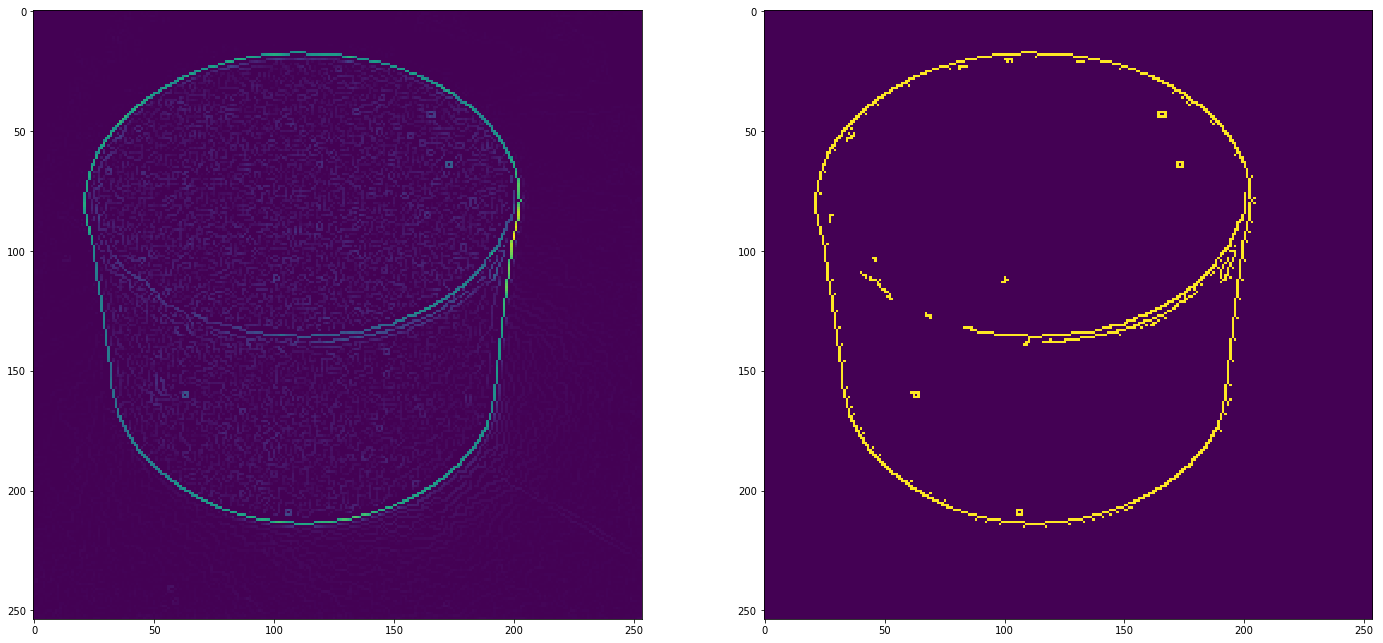

In [87]:
gl,gm,f = canny_edge(image)
fig = figure(0, (24,24))
fig.add_subplot(1,2,1)
imshow(gm*255)
fig.add_subplot(1,2,2)
imshow(f*255)
print(gm.mean())
print(f.mean())